In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Model,Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.utils import np_utils

In [21]:
data=pd.read_csv('fashion-mnist_test.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x=data.values


In [23]:
X=x[:,1:]
y=x[:,0]
X=X/255
print(X.shape)
print(y.shape)
y=np_utils.to_categorical(y)
print(X.shape,y.shape)

(10000, 784)
(10000,)
(10000, 784) (10000, 10)


In [24]:

X_train=X[:8000,:]
y_train=y[:8000,:]

X_val=X[8000:,:]
y_val=y[8000:,:]
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(8000, 784) (8000, 10)
(2000, 784) (2000, 10)


In [31]:
#Sequential Model

model=Sequential()
model.add(Dense(256,activation='tanh',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam=Adam(decay=0.0001)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

W0703 20:10:44.952893 139953011816256 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 20:10:44.972699 139953011816256 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
history=model.fit(X_train,y_train,epochs=10,batch_size=500,shuffle=True,validation_data=(X_val,y_val))

W0703 20:10:45.204470 139953011816256 deprecation.py:323] From /home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0703 20:10:45.305749 139953011816256 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 19s 2ms/step - loss: 1.2559 - acc: 0.5919 - val_loss: 0.7817 - val_acc: 0.7255
Epoch 2/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.6741 - acc: 0.7664 - val_loss: 0.5950 - val_acc: 0.7850
Epoch 3/10
8000/8000 [==============================] - 0s 50us/step - loss: 0.5590 - acc: 0.8109 - val_loss: 0.5239 - val_acc: 0.8240
Epoch 4/10
8000/8000 [==============================] - 0s 54us/step - loss: 0.4992 - acc: 0.8311 - val_loss: 0.4847 - val_acc: 0.8285
Epoch 5/10
8000/8000 [==============================] - 0s 54us/step - loss: 0.4625 - acc: 0.8401 - val_loss: 0.4585 - val_acc: 0.8355
Epoch 6/10
8000/8000 [==============================] - 0s 51us/step - loss: 0.4446 - acc: 0.8439 - val_loss: 0.4642 - val_acc: 0.8375
Epoch 7/10
8000/8000 [==============================] - 0s 50us/step - loss: 0.4226 - acc: 0.8507 - val_loss: 0.4345 - val_acc: 0.8465
Epoch 8

In [10]:
model.save("mymodel.h5") 

In [11]:
model.load_weights("mymodel.h5")

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss,acc=model.evaluate(X_train,y_train)
print("Restored model,acc: {:5.2f}%".format(100*acc))
print("Restored model,loss: {:5.2f}%".format(100*loss))

8000/8000 [==============================] - 1s 146us/step
Restored model,acc: 86.78%
Restored model,loss: 37.83%


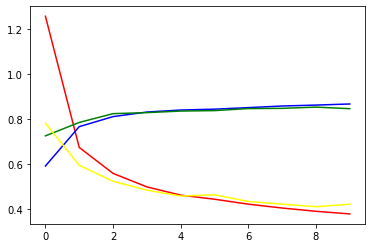

In [14]:
#Adam with decay(learning rate)

plt.plot(history.history['loss'],color='red',label='line1') ## training loss
 
plt.plot(history.history['acc'],color='blue',label='line2')  ## training accuracy
plt.plot(history.history['val_acc'],color='green',label='line3') #validation accuracy
plt.plot(history.history['val_loss'],color='yellow',label='line4') #validation loss
plt.show()

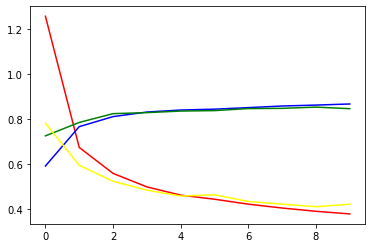

In [15]:
#Adam with learning rate=1

plt.plot(history.history['loss'],color='red',label='line1') ## training loss
 
plt.plot(history.history['acc'],color='blue',label='line2')  ## training accuracy
plt.plot(history.history['val_acc'],color='green',label='line3') #validation accuracy
plt.plot(history.history['val_loss'],color='yellow',label='line4') #validation loss
plt.show()

In [28]:
#Functional Model
input1=Input(shape=(784,))
d1=Dense(256,activation='relu')(input1)
d2=Dense(64,activation='relu')(d1)
d3=Dense(10,activation='softmax')(d2)
model=Model(inputs=[input1],output=[d3])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
Total params: 217,408
Trainable params: 217,408
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [32]:
adam=Adam(decay=0.0001)

In [33]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [35]:
hist=model.fit(X,y,epochs=10,batch_size=300,shuffle=True,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 4s 453us/step - loss: 1.1703 - acc: 0.5922 - val_loss: 0.6826 - val_acc: 0.7575
Epoch 2/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.6007 - acc: 0.7939 - val_loss: 0.5278 - val_acc: 0.8200
Epoch 3/10
8000/8000 [==============================] - 0s 27us/step - loss: 0.5075 - acc: 0.8227 - val_loss: 0.4802 - val_acc: 0.8320
Epoch 4/10
8000/8000 [==============================] - 0s 27us/step - loss: 0.4633 - acc: 0.8359 - val_loss: 0.4487 - val_acc: 0.8430
Epoch 5/10
8000/8000 [==============================] - 0s 27us/step - loss: 0.4447 - acc: 0.8423 - val_loss: 0.4334 - val_acc: 0.8495
Epoch 6/10
8000/8000 [==============================] - 0s 27us/step - loss: 0.4189 - acc: 0.8485 - val_loss: 0.4412 - val_acc: 0.8405
Epoch 7/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.3998 - acc: 0.8596 - val_loss: 0.4196 - val_acc: 0.8635
Epoch 

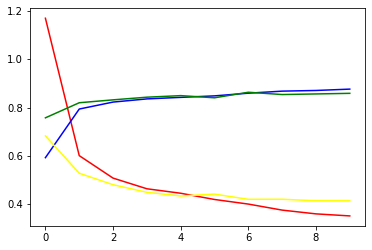

In [47]:
#Adam with decay(learning rate)

plt.plot(hist.history['loss'],color='red',label='line1') ## training loss
 
plt.plot(hist.history['acc'],color='blue',label='line2')  ## training accuracy
plt.plot(hist.history['val_acc'],color='green',label='line3') #validation accuracy
plt.plot(hist.history['val_loss'],color='yellow',label='line4') #validation loss
plt.savefig("amay.png")
plt.show()


In [41]:
plt.savefig('plot.png')

<Figure size 432x288 with 0 Axes>

In [44]:
plt.savefig?